In [2]:
library(Seurat)
library(reticulate)
library(tidyverse)
library(viridis)
library(leiden)
library(biomaRt)

Attaching SeuratObject

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite

conda environment r-reticulate installed

python modules igraph and leidenalg installed



In [3]:
setwd("/home/jovyan/data/")

In [4]:
data <- readRDS("ClatCov/COV_subsetanno1_raw_120721.rds")
data

An object of class Seurat 
25675 features across 292189 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [5]:
levels(data@meta.data$subset_annotations)

[1] "B FO"                    "B Naive"                
 [3] "Basal epithelial"        "Basophil"               
 [5] "Bmem non-switched"       "Bmem switched"          
 [7] "CD4 Act"                 "CD4 Tcm"                
 [9] "CD4 Tem"                 "CD4 Th2"                
[11] "CD4 Th17"                "CD4 Tn"                 
[13] "CD4 Trm"                 "CD8 CTL"                
[15] "CD8 Tn"                  "CD8 Trm"                
[17] "Ciliated epithelial"     "DOUBLET"                
[19] "Endothelial-Stromal"     "Erythrocyte"            
[21] "Follicular DC"           "ILC"                    
[23] "Ionocyte"                "MAIT"                   
[25] "Macrophage non-resident" "Macrophage resident"    
[27] "Mast"                    "Megakaryocyte"          
[29] "Monocyte classical"      "Monocyte non-classical" 
[31] "NK CD16+"                "NK CD56+"               
[33] "Plasma"                  "Plasmablast IgM+"       
[35] "Secretory epithelial"    "Squamous epithelial"    
[37] "Tfh"                     "Treg"                   
[39] "aNK KLRC2+"              "cDC CD1c+"              
[41] "cDC CD141+"              "gdT vd1"                
[43] "gdT vd2"                 "gdT vd3"                
[45] "pDC"

In [6]:
datand <- subset(data, subset = subset_annotations %in% c('B FO',
                                                          'B Naive',
                                                          'Basal epithelial',
                                                          'Basophil',
                                                          'Bmem non-switched',
                                                          'Bmem switched',
                                                          'CD4 Act',
                                                          'CD4 Tcm',
                                                          'CD4 Tem',
                                                          'CD4 Th2',
                                                          'CD4 Th17',
                                                          'CD4 Tn',
                                                          'CD4 Trm',
                                                          'CD8 CTL',
                                                          'CD8 Tn',
                                                          'CD8 Trm',
                                                          'Ciliated epithelial',
                                                          'Endothelial-Stromal',
                                                          'Erythrocyte',
                                                          'Follicular DC',
                                                          'ILC',
                                                          'Ionocyte',
                                                          'MAIT',
                                                          'Macrophage non-resident',
                                                          'Macrophage resident',
                                                          'Mast',
                                                          'Megakaryocyte',
                                                          'Monocyte classical',
                                                          'Monocyte non-classical',
                                                          'NK CD16+',
                                                          'NK CD56+',
                                                          'Plasma',
                                                          'Plasmablast IgM+',
                                                          'Secretory epithelial',
                                                          'Squamous epithelial',
                                                          'Tfh',
                                                          'Treg',
                                                          'aNK KLRC2+',
                                                          'cDC CD1c+',
                                                          'cDC CD141+',
                                                          'gdT vd1',
                                                          'gdT vd2',
                                                          'gdT vd3',
                                                          'pDC'))
datand

An object of class Seurat 
25675 features across 267844 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [7]:
datand@meta.data

latent_RT_efficiency latent_cell_probability
CGCTTCACAAGAAGAG-1-0-0 9.639492             1.0000000              
GGACATTCATAGACTC-1-0-0 5.833257             1.0000000              
GCACATAGTAAGGATT-1-0-0 8.461997             1.0000000              
GACGTGCTCGTAGATC-1-0-0 8.653172             1.0000000              
CTCTGGTAGTACGTAA-1-0-0 7.128809             1.0000000              
TCCCGATCAAGTAGTA-1-0-0 7.757183             1.0000000              
TATCTCACAGATTGCT-1-0-0 9.283535             1.0000000              
GATGAAAAGCGCCTCA-1-0-0 8.028753             1.0000000              
CATGACATCCAGTATG-1-0-0 7.232700             1.0000000              
AAAGTAGGTTCAGACT-1-0-0 7.210078             1.0000000              
CAGAATCTCCGATATG-1-0-0 6.187824             1.0000000              
CGGAGCTAGGAGCGAG-1-0-0 5.181709             1.0000000              
CCCTCCTAGTGAAGTT-1-0-0 5.068830             1.0000000              
ATCGAGTCACAGAGGT-1-0-0 3.604010             0.9997603              
CGGTTAATCTTACCTA-1-0-0 5.216625             1.0000000              
ACGCAGCCACGCGAAA-1-0-0 3.384279             0.9999229              
GCATGCGCAAACGCGA-1-0-0 3.560922             0.9999095              
CGATCGGGTTGGTAAA-1-0-0 3.764012             0.9999659              
GGGAATGGTATCGCAT-1-0-0 3.507053             0.9999226              
TTAACTCGTTGACGTT-1-0-0 3.403012             0.9997582              
AAGCCGCGTCATCCCT-1-0-0 3.432607             0.9998242              
GATGCTAGTCAAAGCG-1-0-0 3.476771             0.9998247              
TACTCATCACCACCAG-1-0-0 3.471695             0.9998515              
AGGCCACAGCGTAGTG-1-0-0 3.927148             0.9999892              
CTCGAGGAGGAGTCTG-1-0-0 3.381853             0.9999299              
TCAGCAAGTCCAGTTA-1-0-0 3.561635             0.9997494              
TCGGGACAGGGTTCCC-1-0-0 3.291062             0.9997742              
ACATGGTGTAAACACA-1-0-0 5.259748             1.0000000              
CCACTACCATATGGTC-1-0-0 3.464855             0.9997458              
GCATGTAGTACTTAGC-1-0-0 3.313223             0.9998412              
⋮                      ⋮                    ⋮                      
TTTGCGCCATGATCCA-1-7-1 NaN                  NaN                    
TTTGCGCGTCTGCCAG-1-7-1 NaN                  NaN                    
TTTGCGCGTTACGACT-1-7-1 NaN                  NaN                    
TTTGCGCTCGATAGAA-1-7-1 NaN                  NaN                    
TTTGCGCTCGCCTGAG-1-7-1 NaN                  NaN                    
TTTGGTTAGAGGTTAT-1-7-1 NaN                  NaN                    
TTTGGTTAGCCGATTT-1-7-1 NaN                  NaN                    
TTTGGTTAGCTAACTC-1-7-1 NaN                  NaN                    
TTTGGTTAGTGCAAGC-1-7-1 NaN                  NaN                    
TTTGGTTCAATACGCT-1-7-1 NaN                  NaN                    
TTTGGTTGTGATGTGG-1-7-1 NaN                  NaN                    
TTTGGTTTCGGGAGTA-1-7-1 NaN                  NaN                    
TTTGGTTTCTATCGCC-1-7-1 NaN                  NaN                    
TTTGTCAAGAGCTATA-1-7-1 NaN                  NaN                    
TTTGTCAAGCACCGCT-1-7-1 NaN                  NaN                    
TTTGTCAAGCTTTGGT-1-7-1 NaN                  NaN                    
TTTGTCAAGGAGTCTG-1-7-1 NaN                  NaN                    
TTTGTCAAGGTAAACT-1-7-1 NaN                  NaN                    
TTTGTCAAGTCTCAAC-1-7-1 NaN                  NaN                    
TTTGTCACAAGCGAGT-1-7-1 NaN                  NaN                    
TTTGTCACAAGGCTCC-1-7-1 NaN                  NaN                    
TTTGTCACAATGGACG-1-7-1 NaN                  NaN                    
TTTGTCACACACTGCG-1-7-1 NaN                  NaN                    
TTTGTCACATAGACTC-1-7-1 NaN                  NaN                    
TTTGTCAGTCACTGGC-1-7-1 NaN                  NaN                    
TTTGTCAGTCCTCTTG-1-7-1 NaN                  NaN                    
TTTGTCAGTCTAGGTT-1-7-1 NaN                  NaN                    
TTTGTCAGTGG

In [10]:
#tmp <- data@meta.data
#tmp <- tmp[match(row.names(tmp), data2@meta.data)] # just to make sure the ordering is correct
#data2@meta.data <- tmp

ERROR: Error in `[.data.frame`(tmp, match(row.names(tmp), data2@meta.data)): undefined columns selected


In [11]:
#data2@meta.data <- data@meta.data

In [12]:
#data2@meta.data

scrublet_score nFeaturess_RNA percent_mito nCounts_RNA
AAACCTGAGAGTAAGG-1-0  0.11510791      746           7.180081     1727       
AAACCTGAGAGTACCG-1-0  0.10199557      801           8.048905     1963       
AAACCTGAGATCACGG-1-0  0.04644412      719           2.227050     1841       
AAACCTGAGATGCCTT-1-0  0.09072165      748           9.357697     1806       
AAACCTGAGCTCTCGG-1-0  0.03592423      679           1.541976     1751       
AAACCTGAGCTTATCG-1-0  0.25652174     1827           3.272231     6601       
AAACCTGAGGACACCA-1-0  0.16537867      538           3.997421     1551       
AAACCTGAGGACATTA-1-0  0.01224890      429           7.418398      674       
AAACCTGCAATTGCTG-1-0  0.06655143      716           6.916100     1764       
AAACCTGCACAACGTT-1-0  0.04644412      644           3.340403     1886       
AAACCTGGTCAGAAGC-1-0  0.08565737      673           5.330243     1726       
AAACCTGGTCGCGAAA-1-0  0.07438017      692           4.934770     1763       
AAACCTGTCCACTCCA-1-0  0.05639396      498           4.704463      829       
AAACCTGTCGCTTAGA-1-0  0.04149378     1004           4.201331     2404       
AAACCTGTCGGTTCGG-1-0  0.07649254      691           2.227723     1616       
AAACGGGAGAGGTAGA-1-0  0.06655143      692           3.326613     1984       
AAACGGGAGCATGGCA-1-0  0.12643678      994           1.532942     3066       
AAACGGGAGGTAGCTG-1-0  0.12250000     1808           3.081232     6069       
AAACGGGAGTGTACGG-1-0  0.06125828      654           4.613541     1669       
AAACGGGAGTTATCGC-1-0  0.07438017      644           8.437761     1197       
AAACGGGCACCATCCT-1-0  0.10199557      571           3.047619     1575       
AAACGGGCACGGCCAT-1-0  0.09072165      648           2.606484     1573       
AAACGGGCACGGTTTA-1-0  0.10508475     1109           1.497270     5677       
AAACGGGGTACCGTTA-1-0  0.10199557      547           5.625606     1031       
AAACGGGGTTCCGGCA-1-0  0.14899713      980           3.847728     2443       
AAACGGGTCACGACTA-1-0  0.03189493      843           4.813278     2410       
AAACGGGTCGAACTGT-1-0  0.16537867      627           4.767959     1573       
AAAGATGAGAAGGACA-1-0  0.04516129      806           3.340858     2215       
AAAGATGAGAAGGGTA-1-0  0.05959184      852           3.525641     2496       
AAAGATGCAGCTGGCT-1-0  0.09615385      712           4.678068     1988       
⋮                     ⋮              ⋮              ⋮            ⋮          
TTGCCGTGTATAGGTA-1-32 0.07239264      159           0.3861004     518       
TTGCCGTTCTGCAAGT-1-32 0.25663717      157           0.7440476     672       
TTGGAACGTATTACCG-1-32 0.09482759     1277           1.6678013    5876       
TTGGAACTCCTTTCGG-1-32 0.24157303      144           0.5689900     703       
TTGGAACTCGAACTGT-1-32 0.14448669      944           0.6739680    3561       
TTGGCAAAGATGTGGC-1-32 0.12651646      198           0.2770083     722       
TTGGCAAAGTCTCGGC-1-32 0.10271903      170           0.9389671     639       
TTGGCAATCTTGAGAC-1-32 0.16631579      157           0.4249292     706       
TTGTAGGAGGCTAGCA-1-32 0.57396450      184           0.6060606    1320       
TTGTAGGAGTTGTCGT-1-32 0.36220472      159           2.4590164     732       
TTGTAGGCATTAACCG-1-32 0.15127701      361           0.2411091    1659       
TTGTAGGGTCAAAGAT-1-32 0.14448669      224           4.3771043     594       
TTGTAGGTCGCAAACT-1-32 0.08433735      967           1.2548015    3905       
TTTACTGAGTTATCGC-1-32 0.09482759      208           0.5486968     729       
TTTACTGCAGTGGAGT-1-32 0.16631579      182           0.8928572     560       
TTTACTGGTTTGTTGG-1-32 0.19339623      196           0.6750241    1037       
TTTACTGTCACCTTAT-1-32 0.51612903      174           0.6006006     999       
TTTACTGTCCAGTAGT-1-32 0.12121212      167           0.5738881     697       
TTTATGCTCTTGACGA-1-32 0.09116410     1545           2.2782609    5750       
TTTCCTCAGCCACCTG-1-32 0.06228766      187           0.4411765     680       
TTTCCTCCACTTGGAT-1

In [20]:
table(datand@meta.data$Patient, datand@meta.data$broad_label)

            
                 B CD4 T CD8 CTL CD8 Tn    DC Epithelium Erythrocyte   MMP
  1           1162   601     175     17    14         27           1   331
  2            513  2062     796    173    55       1216           6  1314
  3           2911  5304    1611    900    76         76          12   912
  C17         2994 11484     875   1028   235         93           2   556
  C19         2621  3128    1126    232    85          8           2   842
  C20         1085  1758     681    804    66         21           5   440
  C21         1348  2890     752    209   137        141           3  1324
  C24          982   799     267     84   137        422          11  1721
  C26         2653  2503     311    113    23         18           2    21
  CV004_2_4    882  1425     284     68    16       1706          10   840
  CV004_2_5   2172  1700     437     70    45        220           2  1850
  CV004_2_6   2035  5513    1104   1950    77         32           7  1192
  CV004_2_7 

In [13]:
#saveRDS(object = data2, file = "IRVAS/EGPA_ctrl_raw_norm_nolog_labels.rds")

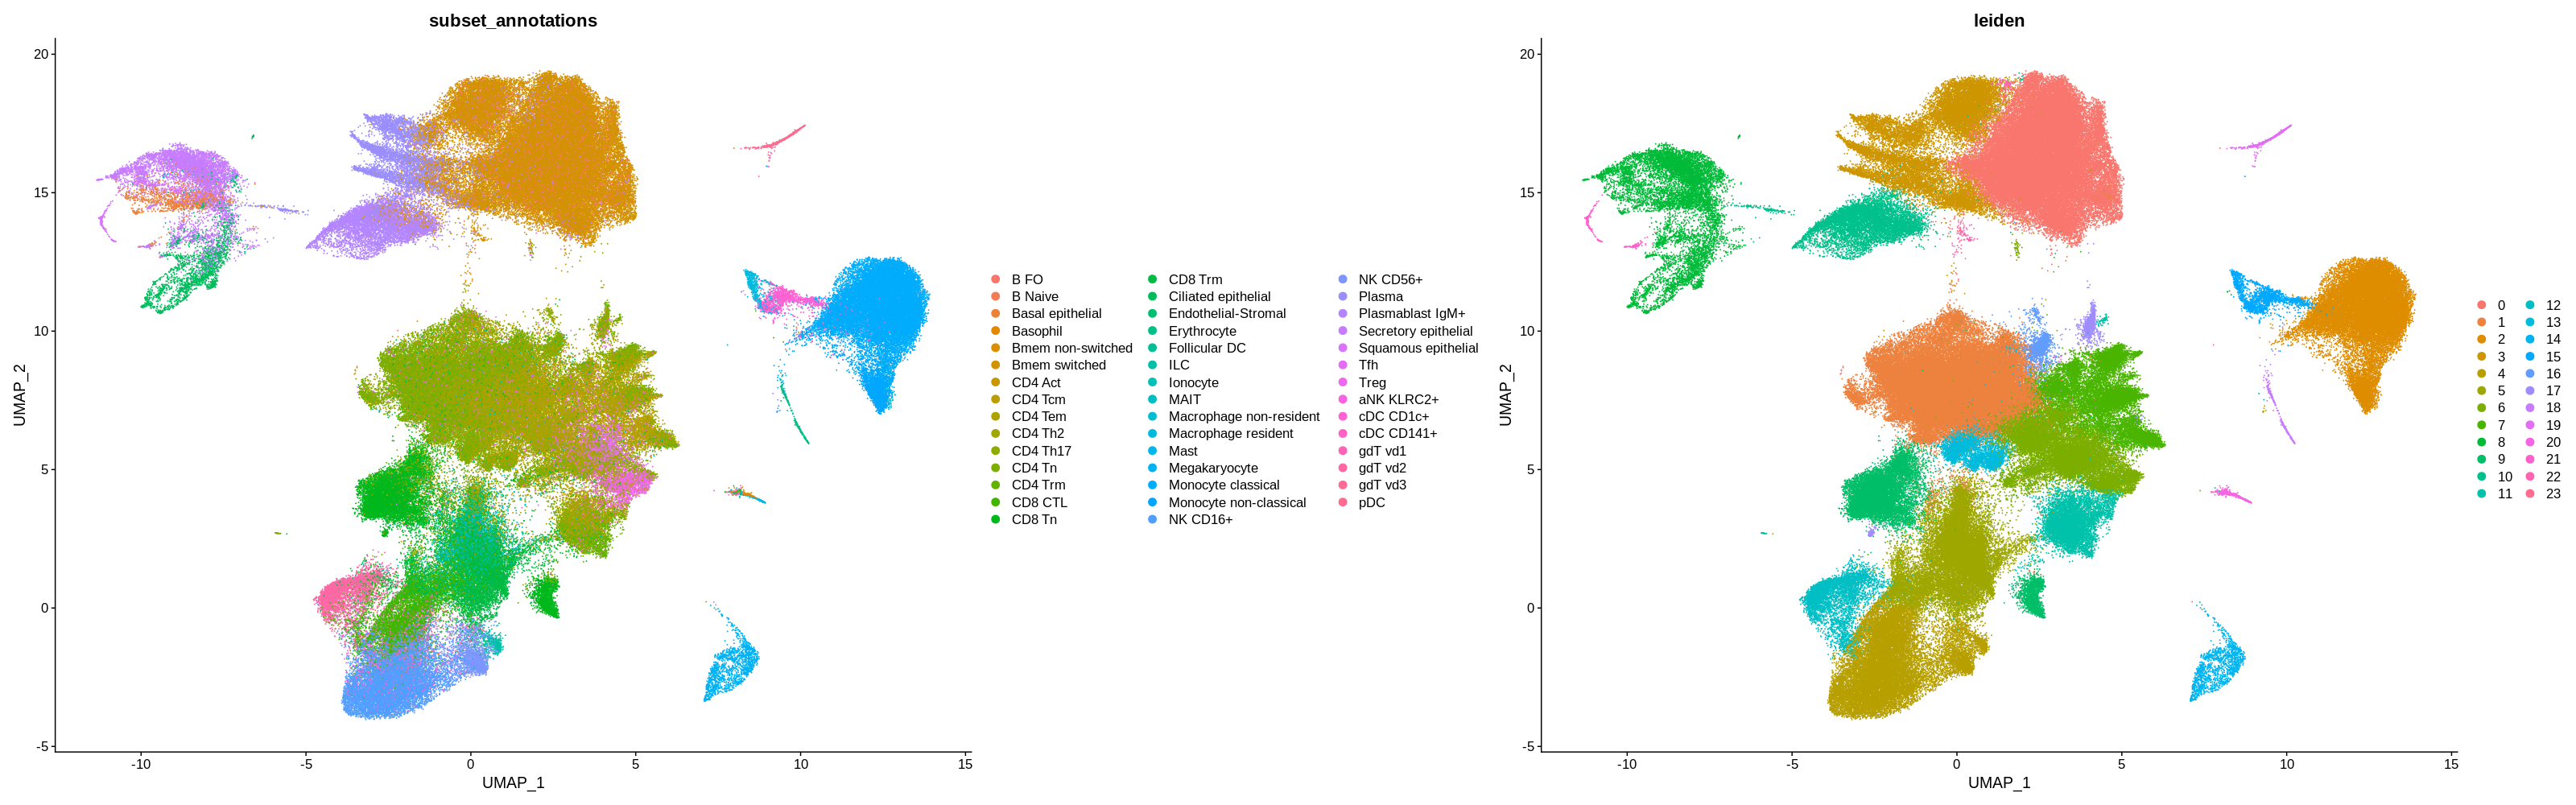

In [6]:
options(repr.plot.width = 32, repr.plot.height = 10, repr.plot.res = 100)
DimPlot(datand,group.by = c("subset_annotations", "leiden"), raster=F)

In [6]:
Idents(datand) <- 'subset_annotations'
levels(Idents(datand))

[1] "B FO"                    "B Naive"                
 [3] "Basal epithelial"        "Basophil"               
 [5] "Bmem non-switched"       "Bmem switched"          
 [7] "CD4 Act"                 "CD4 Tcm"                
 [9] "CD4 Tem"                 "CD4 Th2"                
[11] "CD4 Th17"                "CD4 Tn"                 
[13] "CD4 Trm"                 "CD8 CTL"                
[15] "CD8 Tn"                  "CD8 Trm"                
[17] "Ciliated epithelial"     "Endothelial-Stromal"    
[19] "Erythrocyte"             "Follicular DC"          
[21] "ILC"                     "Ionocyte"               
[23] "MAIT"                    "Macrophage non-resident"
[25] "Macrophage resident"     "Mast"                   
[27] "Megakaryocyte"           "Monocyte classical"     
[29] "Monocyte non-classical"  "NK CD16+"               
[31] "NK CD56+"                "Plasma"                 
[33] "Plasmablast IgM+"        "Secretory epithelial"   
[35] "Squamous epithelial"     "Tfh"                    
[37] "Treg"                    "aNK KLRC2+"             
[39] "cDC CD1c+"               "cDC CD141+"             
[41] "gdT vd1"                 "gdT vd2"                
[43] "gdT vd3"                 "pDC"

In [7]:
colnames(datand@meta.data)

[1] "latent_RT_efficiency"     "latent_cell_probability" 
 [3] "latent_scale"             "doublet_score"           
 [5] "predicted_doublet"        "Sampleid"                
 [7] "Patient"                  "Sampletype"              
 [9] "Age_group"                "Gender"                  
[11] "Cohort"                   "Diseasetype"             
[13] "Batch"                    "Study"                   
[15] "Nasal_inflammation"       "COVID_severity"          
[17] "sampleid"                 "soup_correction"         
[19] "scrublet_score"           "nFeaturess_RNA"          
[21] "is_doublet"               "filter_rna"              
[23] "batch"                    "nFeaturess_RNA_by_counts"
[25] "total_counts"             "total_counts_mt"         
[27] "pct_counts_mt"            "celltypist"              
[29] "combined_doublet"         "cellbender_cell"         
[31] "leiden"                   "broad_label"             
[33] "fine_label"               "moderate-severe"         
[35] "subset_annotation"        "subset_annotations"      
[37] "nCount_RNA"               "nFeature_RNA"

In [8]:
levels(datand@meta.data$Diseasetype)

[1] "Active COV"      "Conval COV"      "GPA control"     "Healthy control"

In [9]:

# biomart dataset
mart <- useMart("ensembl", dataset="hsapiens_gene_ensembl")
h2m <- getBM(attributes=c("external_gene_name","ensembl_gene_id"), mart=mart)



In [10]:
data_severeCOV <- subset(datand, subset = COVID_severity %in% c('moderate','severe'))
data_severeCOV

An object of class Seurat 
25675 features across 25705 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [11]:
data_mildCOV <- datand %>% subset(subset = COVID_severity == 'mild') %>% subset(subset = Diseasetype == 'Active COV')
data_mildCOV

An object of class Seurat 
25675 features across 29754 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [13]:
data_nasal_severeCOV <- subset(data_severeCOV, subset = Sampletype == 'Nasal')
data_nasal_severeCOV
data_blood_severeCOV <- subset(data_severeCOV, subset = Sampletype == 'Blood')
data_blood_severeCOV
data_nasal_H <- subset(data_healthy_control, subset = Sampletype == 'Nasal')
data_nasal_H
data_blood_H <- subset(data_healthy_control, subset = Sampletype == 'Blood')
data_blood_H
data_nasal_mildCOV <- subset(data_mildCOV, subset = Sampletype == 'Nasal')
data_nasal_mildCOV
data_blood_mildCOV <- subset(data_mildCOV, subset = Sampletype == 'Blood')
data_blood_mildCOV

An object of class Seurat 
25675 features across 15082 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

An object of class Seurat 
25675 features across 10623 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

An object of class Seurat 
25675 features across 37352 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

An object of class Seurat 
25675 features across 24040 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

An object of class Seurat 
25675 features across 16267 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

An object of class Seurat 
25675 features across 13487 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [12]:
data_healthy_control <- subset(datand, subset = Diseasetype == 'Healthy control')
data_healthy_control

An object of class Seurat 
25675 features across 61392 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [10]:
#BCD4 <- subset(data_nasal_EGPA, idents = c("B", "CD4 T", "CD4 Tem", 'CD4 Tn/cm'))
#BCD4

An object of class Seurat 
25525 features across 18481 samples within 1 assay 
Active assay: RNA (25525 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [14]:
#create expression matrix and identities
sCOVnasal_em <- as.matrix(data_nasal_severeCOV@assays$RNA@data)
mCOVnasal_em <- as.matrix(data_nasal_mildCOV@assays$RNA@data)
hnasal_em <- as.matrix(data_nasal_H@assays$RNA@data)
sCOVblood_em <- as.matrix(data_blood_severeCOV@assays$RNA@data)
mCOVblood_em <- as.matrix(data_blood_mildCOV@assays$RNA@data)
hblood_em <- as.matrix(data_blood_H@assays$RNA@data)

sCOVnasal_id <- as.data.frame(data_nasal_severeCOV@active.ident)
mCOVnasal_id <- as.data.frame(data_nasal_mildCOV@active.ident)
hnasal_id <- as.data.frame(data_nasal_H@active.ident)
sCOVblood_id <- as.data.frame(data_blood_severeCOV@active.ident)
mCOVblood_id <- as.data.frame(data_blood_mildCOV@active.ident)
hblood_id <- as.data.frame(data_blood_H@active.ident)



In [29]:
data@active.ident

AAACCTGAGAGTAAGG-1-0  AAACCTGAGAGTACCG-1-0  AAACCTGAGATCACGG-1-0 
                    B                     B             CD4 Tn/cm 
 AAACCTGAGATGCCTT-1-0  AAACCTGAGCTCTCGG-1-0  AAACCTGAGCTTATCG-1-0 
                    B             CD4 Tn/cm                     B 
 AAACCTGAGGACACCA-1-0  AAACCTGAGGACATTA-1-0  AAACCTGCAATTGCTG-1-0 
                    B               CD8 Tcm                Plasma 
 AAACCTGCACAACGTT-1-0  AAACCTGGTCAGAAGC-1-0  AAACCTGGTCGCGAAA-1-0 
                    B                     B                  Treg 
 AAACCTGTCCACTCCA-1-0  AAACCTGTCGCTTAGA-1-0  AAACCTGTCGGTTCGG-1-0 
            CD4 Tn/cm               CD8 Tcm               CD8 Tcm 
 AAACGGGAGAGGTAGA-1-0  AAACGGGAGCATGGCA-1-0  AAACGGGAGGTAGCTG-1-0 
            CD4 Tn/cm             CD4 Tn/cm                Plasma 
 AAACGGGAGTGTACGG-1-0  AAACGGGAGTTATCGC-1-0  AAACGGGCACCATCCT-1-0 
            CD4 Tn/cm               CD4 Tem                     B 
 AAACGGGCACGGCCAT-1-0  AAACGGGCACGGTTTA-1-0  AAACGGGGTACCGTTA-1-0 
                    B                Plasma                     B 
 AAACGGGGTTCCGGCA-1-0  AAACGGGTCACGACTA-1-0  AAACGGGTCGAACTGT-1-0 
                    B                CD8 Tn                     B 
 AAAGATGAGAAGGACA-1-0  AAAGATGAGAAGGGTA-1-0  AAAGATGCAGCTGGCT-1-0 
            CD4 Tn/cm             CD4 Tn/cm             CD4 Tn/cm 
 AAAGATGCATAGAAAC-1-0  AAAGATGCATCACCCT-1-0  AAAGATGGTGTGCGTC-1-0 
                    B                     B               CD8 Tcm 
 AAAGATGGTGTTGGGA-1-0  AAAGATGTCCCGGATG-1-0  AAAGATGTCCGAGCCA-1-0 
            CD4 Tn/cm                     B                  Treg 
 AAAGATGTCCTTTACA-1-0  AAAGATGTCGCAAGCC-1-0  AAAGATGTCGCACTCT-1-0 
                    B                     B                     B 
 AAAGCAAAGAGCTATA-1-0  AAAGCAACACATCTTT-1-0  AAAGCAACATGCAATC-1-0 
                    B             CD4 Tn/cm                  Treg 
 AAAGCAAGTAGCACGA-1-0  AAAGCAAGTCGGCTCA-1-0  AAAGCAAGTGACGGTA-1-0 
                    B                  Treg                     B 
 AAAGCAAGTGATGCCC-1-0  AAAGCAATCGCAAACT-1-0  AAAGCAATCTATCCTA-1-0 
                    B                  Treg                     B 
 AAAGCAATCTCCCTGA-1-0  AAAGCAATCTCTGAGA-1-0  AAAGTAGAGACTGTAA-1-0 
                 Treg             CD4 Tn/cm             CD4 Tn/cm 
 AAAGTAGAGATAGCAT-1-0  AAAGTAGAGCTACCGC-1-0  AAAGTAGAGCTAGTTC-1-0 
                    B             CD4 Tn/cm             CD4 Tn/cm 
 AAAGTAGAGTACCGGA-1-0  AAAGTAGAGTGCGTGA-1-0  AAAGTAGAGTGTCTCA-1-0 
                    B                  Treg                     B 
 AAAGTAGCAAACCTAC-1-0  AAAGTAGCAAAGGTGC-1-0  AAAGTAGCAACTGCGC-1-0 
               Plasma                     B             CD4 Tn/cm 
 AAAGTAGCAAGGACAC-1-0  AAAGTAGCAGCGTTCG-1-0  AAAGTAGCATTAGCCA-1-0 
                    B                     B                     B 
 AAAGTAGGTAGCGTCC-1-0  AAAGTAGGTCAGGACA-1-0  AAAGTAGGTCGAATCT-1-0 
                    B                CD8 Tn                     B 
 AAAGTAGGTGACTACT-1-0  AAAGTAGTCCTCAACC-1-0  AAAGTAGTCCTCTAGC-1-0 
                    B                  Treg                     B 
 AAAGTAGTCGAGCCCA-1-0  AAAGTAGTCGCAAACT-1-0  AAATGCCAGATACACA-1-0 
               Plasma             CD4 Tn/cm               CD8 Tcm 
 AAATGCCAGCCCGAAA-1-0  AAATGCCCAGGATTGG-1-0  AAATGCCGTAGCGCAA-1-0 
                    B                  Treg                     B 
 AAATGCCGTCTGCCAG-1-0  AAATGCCTCACCATAG-1-0  AAATGCCTCCCATTAT-1-0 
            CD4 Tn/cm                     B             CD4 Tn/cm 
 AAATGCCTCCGATATG-1-0  AAATGCCTCCTCGCAT-1-0  AAATGCCTCGACAGCC-1-0 
                    B                     B                  Treg 
 AAATGCCTCGGCATCG-1-0  AAATGCCTCTCTGAGA-1-0  AAATGCCTCTGGAGCC-1-0 
                    B                CD8 Tn                     B 
 AACACGTAGATGCCTT-1-0  AACACGTAGCAACGGT-1-0  AACACGTAGCGTTGCC-1-0 
                    B                  Treg             CD4 Tn/cm 
 AACACGTAGGATGGAA-1-0  AACACGTAGTGAATTG-1-0  AACACGTCACACCGAC-1-0 
                    B     Epithelial/Plasma     

In [16]:
head(sCOVnasal_id)

data_nasal_severeCOV@active.ident
ATCATGGGTTCTGTTT-1-9-0 Bmem switched                    
GATGCTAGTGACAAAT-1-9-0 Bmem switched                    
TTTGCGCGTGATAAAC-1-9-0 Plasma                           
CCTTTCTAGAGTGACC-1-9-0 Tfh                              
GCAAACTTCAGTGTTG-1-9-0 Plasmablast IgM+                 
CGTTCTGCACACATGT-1-9-0 Secretory epithelial

In [17]:
sCOVnasal_id <- data.frame(Cell = row.names(sCOVnasal_id), cell_type = sCOVnasal_id$`data_nasal_severeCOV@active.ident`)
mCOVnasal_id <- data.frame(Cell = row.names(mCOVnasal_id), cell_type = mCOVnasal_id$`data_nasal_mildCOV@active.ident`)
hnasal_id <- data.frame(Cell = row.names(hnasal_id), cell_type = hnasal_id$`data_nasal_H@active.ident`)
sCOVblood_id <- data.frame(Cell = row.names(sCOVblood_id), cell_type = sCOVblood_id$`data_blood_severeCOV@active.ident`)
mCOVblood_id <- data.frame(Cell = row.names(mCOVblood_id), cell_type = mCOVblood_id$`data_blood_mildCOV@active.ident`)
hblood_id <- data.frame(Cell = row.names(hblood_id), cell_type = hblood_id$`data_blood_H@active.ident`)
hblood_id


Cell                    cell_type             
1     AGCTTGACACTGTGTA-1-14-0 cDC CD141+            
2     CGATTGAGTATTCTCT-1-14-0 cDC CD1c+             
3     GAACCTAGTGTGCGTC-1-14-0 cDC CD141+            
4     AAAGATGCAAATCCGT-1-14-0 cDC CD1c+             
5     ACGATGTAGACTGTAA-1-14-0 cDC CD1c+             
6     CTTAACTTCCTTGACC-1-14-0 cDC CD1c+             
7     GAGGTGATCAAAGTAG-1-14-0 Bmem switched         
8     GATCGCGAGCTGCAAG-1-14-0 cDC CD1c+             
9     TCACGAACAGGAACGT-1-14-0 cDC CD1c+             
10    GTATCTTGTGTTCTTT-1-14-0 cDC CD1c+             
11    CGGACTGTCACCGTAA-1-14-0 cDC CD1c+             
12    GCGCAGTGTTATCCGA-1-14-0 cDC CD1c+             
13    GACCTGGCATAAAGGT-1-14-0 cDC CD1c+             
14    TACTCGCAGGTGCTTT-1-14-0 cDC CD1c+             
15    TTAGGCACAAGTAGTA-1-14-0 cDC CD1c+             
16    TAGTTGGGTAGCGTAG-1-14-0 cDC CD1c+             
17    ATAACGCTCCAAGTAC-1-14-0 cDC CD1c+             
18    TAGCCGGGTGCAACGA-1-14-0 cDC CD1c+             
19    TAGACCACAGTGGAGT-1-14-0 cDC CD1c+             
20    CCTTACGTCAGGCGAA-1-14-0 cDC CD1c+             
21    AGCATACGTCACTTCC-1-14-0 cDC CD1c+             
22    GGATTACCATACAGCT-1-14-0 cDC CD1c+             
23    GCATGATGTGAGGCTA-1-14-0 Monocyte non-classical
24    CACAAACAGATACACA-1-14-0 cDC CD1c+             
25    CACATAGCACCTCGGA-1-14-0 cDC CD1c+             
26    GCTTCCATCCTCAACC-1-14-0 cDC CD1c+             
27    GTTAAGCAGGACAGCT-1-14-0 cDC CD1c+             
28    GTGCAGCTCAACGGGA-1-14-0 pDC                   
29    ACTGAACGTTAAGAAC-1-14-0 cDC CD1c+             
30    GCATACATCCAGTAGT-1-14-0 cDC CD1c+             
⋮     ⋮                       ⋮                     
24011 TTTCCTCAGTACGTTC-1-6-1  CD4 Th2               
24012 TTTCCTCCAATAACGA-1-6-1  Monocyte non-classical
24013 TTTCCTCCACTTCGAA-1-6-1  CD8 Trm               
24014 TTTCCTCCAGCGTAAG-1-6-1  NK CD16+              
24015 TTTCCTCCAGGCTCAC-1-6-1  Bmem switched         
24016 TTTCCTCGTAAATGTG-1-6-1  CD4 Th2               
24017 TTTCCTCGTCTGCAAT-1-6-1  CD4 Th2               
24018 TTTGCGCAGAATTGTG-1-6-1  NK CD16+              
24019 TTTGCGCAGGACATTA-1-6-1  MAIT                  
24020 TTTGCGCCAAGGTTTC-1-6-1  CD8 Trm               
24021 TTTGCGCCAATGACCT-1-6-1  CD4 Tn                
24022 TTTGCGCCAGTAGAGC-1-6-1  gdT vd2               
24023 TTTGCGCGTCTCGTTC-1-6-1  CD4 Th2               
24024 TTTGCGCTCGTGACAT-1-6-1  MAIT                  
24025 TTTGCGCTCTCTTGAT-1-6-1  CD4 Th2               
24026 TTTGGTTAGAAGATTC-1-6-1  CD4 Tn                
24027 TTTGGTTAGCGATGAC-1-6-1  CD4 Th2               
24028 TTTGGTTAGTAGTGCG-1-6-1  cDC CD1c+             
24029 TTTGGTTAGTTACCCA-1-6-1  CD8 Trm               
24030 TTTGGTTCAACGATCT-1-6-1  MAIT                  
24031 TTTGGTTCACTTCGAA-1-6-1  CD4 Th2               
24032 TTTGGTTTCCTTCAAT-1-6-1  NK CD16+              
24033 TTTGGTTTCGATGAGG-1-6-1  NK CD16+              
24034 TTTGGTTTCTTCTGGC-1-6-1  NK CD16+              
24035 TTTGTCAAGATACACA-1-6-1  CD4 Tn                
24036 TTTGTCACATACGCCG-1-6-1  NK CD16+              
24037 TTTGTCATCAGCACAT-1-6-1  CD4 Th2               
24038 TTTGTCATCGACCAGC-1-6-1  Monocyte classical    
24039 TTTGTCATCTGCGACG-1-6-1  NK CD16+              
24040 TTTGTCATCTGGTTCC-1-6-1  CD4 Tn

In [18]:
write.table(sCOVnasal_id, "ClatCov/cpdb/sCOVnasal_id.txt", row.names = F, quote = F, sep = "\t")
write.table(mCOVnasal_id, "ClatCov/cpdb/mCOVnasal_id.txt", row.names = F, quote = F, sep = "\t")
write.table(hnasal_id, "ClatCov/cpdb/hnasal_id.txt", row.names = F, quote = F, sep = "\t")
write.table(sCOVblood_id, "ClatCov/cpdb/sCOVnasal_id.txt", row.names = F, quote = F, sep = "\t")
write.table(mCOVblood_id, "ClatCov/cpdb/mCOVblood_id.txt", row.names = F, quote = F, sep = "\t")
write.table(hblood_id, "ClatCov/cpdb/hblood_id.txt", row.names = F, quote = F, sep = "\t")

In [42]:
read.delim(file = '/home/jovyan/data/ClatCov/EGPABCD4nasal_expression_matrix.txt', sep = "\t")

Gene            X370374  X370375  X370377  X370381  X370385  X370387 
1     ENSG00000243485 0        0        0        0.000000 0        0       
2     ENSG00000177757 0        0        0        0.000000 0        0       
3     ENSG00000225880 0        0        0        0.000000 0        0       
4     ENSG00000230368 0        0        0        0.000000 0        0       
5     ENSG00000187634 0        0        0        0.000000 0        0       
6     ENSG00000188976 0        0        0        0.000000 0        0       
7     ENSG00000187961 0        0        0        0.000000 0        0       
8     ENSG00000187583 0        0        0        0.000000 0        0       
9     ENSG00000187642 0        0        0        0.000000 0        0       
10    ENSG00000188290 0        0        0        0.000000 0        0       
11    ENSG00000187608 0        0        0        0.000000 0        0       
12    ENSG00000188157 0        0        0        2.182429 0        0       
13    ENSG00000237330 0        0        0        0.000000 0        0       
14    ENSG00000131591 0        0        0        0.000000 0        0       
15    ENSG00000223823 0        0        0        0.000000 0        0       
16    ENSG00000205231 0        0        0        0.000000 0        0       
17    ENSG00000162571 0        0        0        0.000000 0        0       
18    ENSG00000186891 0        0        0        0.000000 0        0       
19    ENSG00000186827 0        0        0        0.000000 0        0       
20    ENSG00000078808 0        0        0        0.000000 0        0       
21    ENSG00000176022 0        0        0        0.000000 0        0       
22    ENSG00000184163 0        0        0        0.000000 0        0       
23    ENSG00000160087 0        0        0        0.000000 0        0       
24    ENSG00000230415 0        0        0        0.000000 0        0       
25    ENSG00000162572 0        0        0        0.000000 0        0       
26    ENSG00000131584 0        0        0        2.182429 0        0       
27    ENSG00000169972 0        0        0        0.000000 0        0       
28    ENSG00000127054 0        0        0        0.000000 0        0       
29    ENSG00000224051 0        0        0        0.000000 0        0       
30    ENSG00000169962 0        0        0        0.000000 0        0       
⋮     ⋮               ⋮        ⋮        ⋮        ⋮        ⋮        ⋮       
19795 ENSG00000173638 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19796 ENSG00000233922 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19797 ENSG00000183570 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19798 ENSG00000142156 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19799 ENSG00000142173 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19800 ENSG00000281775 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19801 ENSG00000274679 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19802 ENSG00000281289 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19803 ENSG00000215424 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19804 ENSG00000160294 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19805 ENSG00000182362 0.000000 0.000000 0.000000 0.000000 1.668957 0.000000
19806 ENSG00000160298 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19807 ENSG00000160299 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19808 ENSG00000160305 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19809 ENSG00000160307 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
19810 ENSG00000160310 1.977239 0.000000 0.000000 0.000000 0.000000 0.000000
19811 ENSG00000198888 3.796824 0.000000 3.953306 4.157985 4.042809 0.000000
19812 ENSG00000198763 3.469288 2.920139 2.892357 3.202887 3.438699 0.000000
19813 ENSG00000198804 4.326426 4.665918 3.557390 4.710876 4.688277 2.819763
19814 ENSG00000198712 4.405451 2.920139 2.892357 4.558224 3.964228 3.877817
19815 ENSG00000228253 4.326426 2.920139 0.000000 3.875

In [26]:
read.delim(file = '/home/jovyan/data/IRVAS/EGPAnasal_id.txt', sep = "\t")

Cell                  cell_type          
1     AAACCTGAGCATGGCA-1-25 CD4 Tem            
2     AAACCTGCACACAGAG-1-25 Epithelial         
3     AAACCTGCAGCTGTTA-1-25 B                  
4     AAACGGGAGCTAGCCC-1-25 Epithelial         
5     AAACGGGCAATCAGAA-1-25 Endothelial/stromal
6     AAACGGGGTATAGTAG-1-25 Epithelial         
7     AAACGGGGTCCTAGCG-1-25 Epithelial/Plasma  
8     AAACGGGGTTCCATGA-1-25 Epithelial/Plasma  
9     AAAGATGAGAGTGACC-1-25 Epithelial         
10    AAAGATGCAATGGACG-1-25 CD8 Tcm            
11    AAAGATGGTATTAGCC-1-25 B                  
12    AAAGCAACATATACCG-1-25 B                  
13    AAAGCAAGTTAGAACA-1-25 Epithelial/Plasma  
14    AAAGCAATCAACACTG-1-25 Epithelial         
15    AAAGCAATCCGAAGAG-1-25 Epithelial         
16    AAAGTAGAGAAGGTTT-1-25 Treg               
17    AAAGTAGAGCATCATC-1-25 Epithelial/Plasma  
18    AAAGTAGCATCACCCT-1-25 Endothelial/stromal
19    AAAGTAGTCGCCTGTT-1-25 Epithelial         
20    AAAGTAGTCTGTCCGT-1-25 Epithelial         
21    AAATGCCAGCGTGAAC-1-25 Epithelial         
22    AAATGCCGTGACGCCT-1-25 Epithelial         
23    AAATGCCGTGTCAATC-1-25 Epithelial/Plasma  
24    AACACGTGTAAATACG-1-25 Epithelial         
25    AACCATGCACAGGAGT-1-25 CD8 Tcm            
26    AACCATGTCAGAGGTG-1-25 Epithelial         
27    AACCATGTCCGTAGGC-1-25 Epithelial/Plasma  
28    AACCGCGCACATTAGC-1-25 Epithelial         
29    AACGTTGCACGAGGTA-1-25 Epithelial         
30    AACGTTGTCTATGTGG-1-25 Epithelial         
⋮     ⋮                     ⋮                  
31586 TTGCCGTAGGGTTTCT-1-31 Plasma             
31587 TTGCCGTAGTGCCATT-1-31 CD4 Tn/cm          
31588 TTGCGTCGTCAGCTAT-1-31 Plasma             
31589 TTGCGTCTCAACGGGA-1-31 Epithelial/Plasma  
31590 TTGGAACCAAGCCGCT-1-31 Macrophage         
31591 TTGGAACCAAGTTCTG-1-31 Plasma             
31592 TTGGAACCAGGAATCG-1-31 Erythrocyte        
31593 TTGGAACGTAGCTGCC-1-31 Epithelial/Plasma  
31594 TTGGAACGTGTAACGG-1-31 Epithelial/Plasma  
31595 TTGGCAAAGAATCTCC-1-31 Epithelial/Plasma  
31596 TTGGCAACATTCACTT-1-31 Epithelial/Plasma  
31597 TTGGCAAGTAGTAGTA-1-31 Plasma             
31598 TTGGCAAGTATCAGTC-1-31 Plasma             
31599 TTGGCAAGTTCATGGT-1-31 CD4 Tn/cm          
31600 TTGGCAAGTTCGCGAC-1-31 Treg               
31601 TTGTAGGAGGAGTAGA-1-31 Epithelial/Plasma  
31602 TTGTAGGCAAACTGTC-1-31 Epithelial/Plasma  
31603 TTGTAGGGTAGTGAAT-1-31 Plasma             
31604 TTTACTGAGGGTATCG-1-31 CD4 Tn/cm          
31605 TTTACTGCAAGGTTTC-1-31 CD8 Tcm            
31606 TTTATGCCAAACTGTC-1-31 B                  
31607 TTTCCTCAGTTATCGC-1-31 Plasma             
31608 TTTGCGCAGACCTAGG-1-31 Plasma             
31609 TTTGCGCAGCCGATTT-1-31 Epithelial/Plasma  
31610 TTTGCGCAGGCACATG-1-31 Plasma             
31611 TTTGCGCCACAGGAGT-1-31 Treg               
31612 TTTGCGCCATTAACCG-1-31 B                  
31613 TTTGCGCTCCAATGGT-1-31 Plasma             
31614 TTTGTCAGTCGTGGCT-1-31 CD4 Tn/cm          
31615 TTTGTCAGTGCAACGA-1-31 Epithelial/Plasma

In [15]:
#convert symbols 
sCNidx <- match(row.names(sCOVnasal_em), h2m$external_gene_name)
mCNidx <- match(row.names(mCOVnasal_em), h2m$external_gene_name)
hNidx <- match(row.names(hnasal_em), h2m$external_gene_name)
sCBidx <- match(row.names(sCOVblood_em), h2m$external_gene_name)
mCBidx <- match(row.names(mCOVblood_em), h2m$external_gene_name)
hBidx <- match(row.names(hblood_em), h2m$external_gene_name)

In [16]:
#create new obj with ensemble ids
ensemble_idssCN <- h2m$ensembl_gene_id[sCNidx]
ensemble_idsmCN <- h2m$ensembl_gene_id[mCNidx]
ensemble_idshN <- h2m$ensembl_gene_id[hNidx]
ensemble_idssCB <- h2m$ensembl_gene_id[sCBidx]
ensemble_idsmCB <- h2m$ensembl_gene_id[mCBidx]
ensemble_idshB <- h2m$ensembl_gene_id[hBidx]


In [17]:
#check if any repeats
which(duplicated(ensemble_idshB))
which(duplicated(ensemble_idshN))
which(duplicated(ensemble_idsmCB))
which(duplicated(ensemble_idsmCN))
which(duplicated(ensemble_idssCB))
which(duplicated(ensemble_idssCN))


[1]     3     4     5     9    10    16    19    21    25    33    47    49
  [13]    57    59    63    69    74    76    84    85    88    91    92    95
  [25]    96    99   101   105   109   114   116   121   127   139   142   145
  [37]   149   150   152   155   156   164   167   168   176   182   183   185
  [49]   190   193   196   198   201   202   216   225   227   238   239   245
  [61]   247   249   251   256   265   266   274   277   278   279   281   282
  [73]   283   285   289   290   301   305   310   312   313   323   325   328
  [85]   341   342   351   361   368   372   388   389   394   399   400   401
  [97]   402   404   406   412   414   416   419   429   441   444   449   466
 [109]   467   472   479   485   486   496   500   515   518   522   523   526
 [121]   528   529   532   537   554   556   561   565   567   569   571   577
 [133]   580   582   583   587   593   598   601   603   605   612   630   634
 [145]   640   641   643   645   647   653   656   663   664   665   668   674
 [157]   678   681   683   684   695   706   711   712   716   720   728   732
 [169]   737   741   743   750   757   761   784   785   794   812   821   834
 [181]   835   838   839   843   848   852   858   864   865   866   868   870
 [193]   871   873   883   885   890   891   901   902   908   909   910   921
 [205]   924   925   927   928   937   943   955   956   961   964   966   980
 [217]   982   989   991   995  1000  1003  1012  1014  1017  1018  1026  1036
 [229]  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071  1084
 [241]  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132  1133
 [253]  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190  1195
 [265]  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241  1244
 [277]  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285  1312
 [289]  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350  1354
 [301]  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372  1373
 [313]  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411  1413
 [325]  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432  1433
 [337]  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473  1474
 [349]  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521  1526
 [361]  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600  1611
 [373]  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676  1677
 [385]  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744  1751
 [397]  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807  1814
 [409]  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851  1857
 [421]  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910  1911
 [433]  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956  1964
 [445]  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010  2012
 [457]  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050  2053
 [469]  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135  2148
 [481]  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204  2206
 [493]  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248  2254
 [505]  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296  2298
 [517]  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346  2347
 [529]  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394  2399
 [541]  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422  2429
 [553]  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464  2467
 [565]  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499  2512
 [577]  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551  2561
 [589]  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592  2593
 [601]  2596  2597  2599  2602  2606  2608  2614  261

[1]     3     4     5     9    10    16    19    21    25    33    47    49
  [13]    57    59    63    69    74    76    84    85    88    91    92    95
  [25]    96    99   101   105   109   114   116   121   127   139   142   145
  [37]   149   150   152   155   156   164   167   168   176   182   183   185
  [49]   190   193   196   198   201   202   216   225   227   238   239   245
  [61]   247   249   251   256   265   266   274   277   278   279   281   282
  [73]   283   285   289   290   301   305   310   312   313   323   325   328
  [85]   341   342   351   361   368   372   388   389   394   399   400   401
  [97]   402   404   406   412   414   416   419   429   441   444   449   466
 [109]   467   472   479   485   486   496   500   515   518   522   523   526
 [121]   528   529   532   537   554   556   561   565   567   569   571   577
 [133]   580   582   583   587   593   598   601   603   605   612   630   634
 [145]   640   641   643   645   647   653   656   663   664   665   668   674
 [157]   678   681   683   684   695   706   711   712   716   720   728   732
 [169]   737   741   743   750   757   761   784   785   794   812   821   834
 [181]   835   838   839   843   848   852   858   864   865   866   868   870
 [193]   871   873   883   885   890   891   901   902   908   909   910   921
 [205]   924   925   927   928   937   943   955   956   961   964   966   980
 [217]   982   989   991   995  1000  1003  1012  1014  1017  1018  1026  1036
 [229]  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071  1084
 [241]  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132  1133
 [253]  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190  1195
 [265]  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241  1244
 [277]  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285  1312
 [289]  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350  1354
 [301]  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372  1373
 [313]  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411  1413
 [325]  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432  1433
 [337]  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473  1474
 [349]  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521  1526
 [361]  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600  1611
 [373]  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676  1677
 [385]  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744  1751
 [397]  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807  1814
 [409]  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851  1857
 [421]  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910  1911
 [433]  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956  1964
 [445]  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010  2012
 [457]  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050  2053
 [469]  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135  2148
 [481]  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204  2206
 [493]  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248  2254
 [505]  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296  2298
 [517]  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346  2347
 [529]  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394  2399
 [541]  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422  2429
 [553]  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464  2467
 [565]  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499  2512
 [577]  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551  2561
 [589]  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592  2593
 [601]  2596  2597  2599  2602  2606  2608  2614  261

[1]     3     4     5     9    10    16    19    21    25    33    47    49
  [13]    57    59    63    69    74    76    84    85    88    91    92    95
  [25]    96    99   101   105   109   114   116   121   127   139   142   145
  [37]   149   150   152   155   156   164   167   168   176   182   183   185
  [49]   190   193   196   198   201   202   216   225   227   238   239   245
  [61]   247   249   251   256   265   266   274   277   278   279   281   282
  [73]   283   285   289   290   301   305   310   312   313   323   325   328
  [85]   341   342   351   361   368   372   388   389   394   399   400   401
  [97]   402   404   406   412   414   416   419   429   441   444   449   466
 [109]   467   472   479   485   486   496   500   515   518   522   523   526
 [121]   528   529   532   537   554   556   561   565   567   569   571   577
 [133]   580   582   583   587   593   598   601   603   605   612   630   634
 [145]   640   641   643   645   647   653   656   663   664   665   668   674
 [157]   678   681   683   684   695   706   711   712   716   720   728   732
 [169]   737   741   743   750   757   761   784   785   794   812   821   834
 [181]   835   838   839   843   848   852   858   864   865   866   868   870
 [193]   871   873   883   885   890   891   901   902   908   909   910   921
 [205]   924   925   927   928   937   943   955   956   961   964   966   980
 [217]   982   989   991   995  1000  1003  1012  1014  1017  1018  1026  1036
 [229]  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071  1084
 [241]  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132  1133
 [253]  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190  1195
 [265]  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241  1244
 [277]  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285  1312
 [289]  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350  1354
 [301]  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372  1373
 [313]  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411  1413
 [325]  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432  1433
 [337]  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473  1474
 [349]  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521  1526
 [361]  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600  1611
 [373]  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676  1677
 [385]  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744  1751
 [397]  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807  1814
 [409]  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851  1857
 [421]  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910  1911
 [433]  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956  1964
 [445]  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010  2012
 [457]  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050  2053
 [469]  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135  2148
 [481]  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204  2206
 [493]  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248  2254
 [505]  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296  2298
 [517]  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346  2347
 [529]  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394  2399
 [541]  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422  2429
 [553]  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464  2467
 [565]  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499  2512
 [577]  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551  2561
 [589]  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592  2593
 [601]  2596  2597  2599  2602  2606  2608  2614  261

[1]     3     4     5     9    10    16    19    21    25    33    47    49
  [13]    57    59    63    69    74    76    84    85    88    91    92    95
  [25]    96    99   101   105   109   114   116   121   127   139   142   145
  [37]   149   150   152   155   156   164   167   168   176   182   183   185
  [49]   190   193   196   198   201   202   216   225   227   238   239   245
  [61]   247   249   251   256   265   266   274   277   278   279   281   282
  [73]   283   285   289   290   301   305   310   312   313   323   325   328
  [85]   341   342   351   361   368   372   388   389   394   399   400   401
  [97]   402   404   406   412   414   416   419   429   441   444   449   466
 [109]   467   472   479   485   486   496   500   515   518   522   523   526
 [121]   528   529   532   537   554   556   561   565   567   569   571   577
 [133]   580   582   583   587   593   598   601   603   605   612   630   634
 [145]   640   641   643   645   647   653   656   663   664   665   668   674
 [157]   678   681   683   684   695   706   711   712   716   720   728   732
 [169]   737   741   743   750   757   761   784   785   794   812   821   834
 [181]   835   838   839   843   848   852   858   864   865   866   868   870
 [193]   871   873   883   885   890   891   901   902   908   909   910   921
 [205]   924   925   927   928   937   943   955   956   961   964   966   980
 [217]   982   989   991   995  1000  1003  1012  1014  1017  1018  1026  1036
 [229]  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071  1084
 [241]  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132  1133
 [253]  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190  1195
 [265]  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241  1244
 [277]  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285  1312
 [289]  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350  1354
 [301]  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372  1373
 [313]  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411  1413
 [325]  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432  1433
 [337]  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473  1474
 [349]  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521  1526
 [361]  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600  1611
 [373]  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676  1677
 [385]  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744  1751
 [397]  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807  1814
 [409]  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851  1857
 [421]  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910  1911
 [433]  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956  1964
 [445]  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010  2012
 [457]  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050  2053
 [469]  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135  2148
 [481]  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204  2206
 [493]  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248  2254
 [505]  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296  2298
 [517]  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346  2347
 [529]  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394  2399
 [541]  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422  2429
 [553]  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464  2467
 [565]  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499  2512
 [577]  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551  2561
 [589]  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592  2593
 [601]  2596  2597  2599  2602  2606  2608  2614  261

[1]     3     4     5     9    10    16    19    21    25    33    47    49
  [13]    57    59    63    69    74    76    84    85    88    91    92    95
  [25]    96    99   101   105   109   114   116   121   127   139   142   145
  [37]   149   150   152   155   156   164   167   168   176   182   183   185
  [49]   190   193   196   198   201   202   216   225   227   238   239   245
  [61]   247   249   251   256   265   266   274   277   278   279   281   282
  [73]   283   285   289   290   301   305   310   312   313   323   325   328
  [85]   341   342   351   361   368   372   388   389   394   399   400   401
  [97]   402   404   406   412   414   416   419   429   441   444   449   466
 [109]   467   472   479   485   486   496   500   515   518   522   523   526
 [121]   528   529   532   537   554   556   561   565   567   569   571   577
 [133]   580   582   583   587   593   598   601   603   605   612   630   634
 [145]   640   641   643   645   647   653   656   663   664   665   668   674
 [157]   678   681   683   684   695   706   711   712   716   720   728   732
 [169]   737   741   743   750   757   761   784   785   794   812   821   834
 [181]   835   838   839   843   848   852   858   864   865   866   868   870
 [193]   871   873   883   885   890   891   901   902   908   909   910   921
 [205]   924   925   927   928   937   943   955   956   961   964   966   980
 [217]   982   989   991   995  1000  1003  1012  1014  1017  1018  1026  1036
 [229]  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071  1084
 [241]  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132  1133
 [253]  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190  1195
 [265]  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241  1244
 [277]  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285  1312
 [289]  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350  1354
 [301]  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372  1373
 [313]  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411  1413
 [325]  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432  1433
 [337]  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473  1474
 [349]  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521  1526
 [361]  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600  1611
 [373]  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676  1677
 [385]  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744  1751
 [397]  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807  1814
 [409]  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851  1857
 [421]  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910  1911
 [433]  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956  1964
 [445]  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010  2012
 [457]  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050  2053
 [469]  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135  2148
 [481]  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204  2206
 [493]  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248  2254
 [505]  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296  2298
 [517]  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346  2347
 [529]  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394  2399
 [541]  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422  2429
 [553]  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464  2467
 [565]  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499  2512
 [577]  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551  2561
 [589]  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592  2593
 [601]  2596  2597  2599  2602  2606  2608  2614  261

[1]     3     4     5     9    10    16    19    21    25    33    47    49
  [13]    57    59    63    69    74    76    84    85    88    91    92    95
  [25]    96    99   101   105   109   114   116   121   127   139   142   145
  [37]   149   150   152   155   156   164   167   168   176   182   183   185
  [49]   190   193   196   198   201   202   216   225   227   238   239   245
  [61]   247   249   251   256   265   266   274   277   278   279   281   282
  [73]   283   285   289   290   301   305   310   312   313   323   325   328
  [85]   341   342   351   361   368   372   388   389   394   399   400   401
  [97]   402   404   406   412   414   416   419   429   441   444   449   466
 [109]   467   472   479   485   486   496   500   515   518   522   523   526
 [121]   528   529   532   537   554   556   561   565   567   569   571   577
 [133]   580   582   583   587   593   598   601   603   605   612   630   634
 [145]   640   641   643   645   647   653   656   663   664   665   668   674
 [157]   678   681   683   684   695   706   711   712   716   720   728   732
 [169]   737   741   743   750   757   761   784   785   794   812   821   834
 [181]   835   838   839   843   848   852   858   864   865   866   868   870
 [193]   871   873   883   885   890   891   901   902   908   909   910   921
 [205]   924   925   927   928   937   943   955   956   961   964   966   980
 [217]   982   989   991   995  1000  1003  1012  1014  1017  1018  1026  1036
 [229]  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071  1084
 [241]  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132  1133
 [253]  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190  1195
 [265]  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241  1244
 [277]  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285  1312
 [289]  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350  1354
 [301]  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372  1373
 [313]  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411  1413
 [325]  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432  1433
 [337]  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473  1474
 [349]  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521  1526
 [361]  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600  1611
 [373]  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676  1677
 [385]  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744  1751
 [397]  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807  1814
 [409]  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851  1857
 [421]  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910  1911
 [433]  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956  1964
 [445]  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010  2012
 [457]  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050  2053
 [469]  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135  2148
 [481]  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204  2206
 [493]  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248  2254
 [505]  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296  2298
 [517]  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346  2347
 [529]  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394  2399
 [541]  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422  2429
 [553]  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464  2467
 [565]  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499  2512
 [577]  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551  2561
 [589]  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592  2593
 [601]  2596  2597  2599  2602  2606  2608  2614  261

In [18]:
#create df
dfsCN <- data.frame(ensemble=ensemble_idssCN, sCOVnasal_em)
dfsCB <- data.frame(ensemble=ensemble_idssCB, sCOVblood_em)
dfmCN <- data.frame(ensemble=ensemble_idsmCN, mCOVnasal_em)
dfmCB <- data.frame(ensemble=ensemble_idsmCB, mCOVblood_em)
dfhN <- data.frame(ensemble=ensemble_idshN, hnasal_em)
dfhB <- data.frame(ensemble=ensemble_idshB, hblood_em)

In [34]:
dfsCN

Gene            ATCATGGGTTCTGTTT-1-9-0 GATGCTAGTGACAAAT-1-9-0
MIR1302-2HG ENSG00000243485 0.0000000              0                     
FAM87B      ENSG00000177757 0.0000000              0                     
LINC00115   ENSG00000225880 0.0000000              0                     
FAM41C      ENSG00000230368 0.0000000              0                     
SAMD11      ENSG00000187634 0.0000000              0                     
NOC2L       ENSG00000188976 0.0000000              0                     
KLHL17      ENSG00000187961 0.0000000              0                     
PLEKHN1     ENSG00000187583 0.0000000              0                     
PERM1       ENSG00000187642 0.0000000              0                     
HES4        ENSG00000188290 0.0000000              0                     
ISG15       ENSG00000187608 0.0000000              0                     
AGRN        ENSG00000188157 0.0000000              0                     
RNF223      ENSG00000237330 0.0000000              0                     
C1orf159    ENSG00000131591 0.0000000              0                     
LINC01342   ENSG00000223823 0.0000000              0                     
TTLL10-AS1  ENSG00000205231 0.0000000              0                     
TTLL10      ENSG00000162571 0.0000000              0                     
TNFRSF18    ENSG00000186891 0.0000000              0                     
TNFRSF4     ENSG00000186827 0.0000000              0                     
SDF4        ENSG00000078808 0.6399461              0                     
B3GALT6     ENSG00000176022 0.0000000              0                     
C1QTNF12    ENSG00000184163 0.0000000              0                     
UBE2J2      ENSG00000160087 0.0000000              0                     
LINC01786   ENSG00000230415 0.0000000              0                     
SCNN1D      ENSG00000162572 0.0000000              0                     
ACAP3       ENSG00000131584 0.6399461              0                     
PUSL1       ENSG00000169972 0.0000000              0                     
INTS11      ENSG00000127054 0.0000000              0                     
CPTP        ENSG00000224051 0.0000000              0                     
TAS1R3      ENSG00000169962 0.0000000              0                     
⋮           ⋮               ⋮                      ⋮                     
SLC19A1     ENSG00000173638 0.0000000              0.0000000             
LINC01694   ENSG00000233922 0.0000000              0.0000000             
PCBP3       ENSG00000183570 0.0000000              0.0000000             
COL6A1      ENSG00000142156 0.0000000              0.0000000             
COL6A2      ENSG00000142173 0.0000000              0.0000000             
FTCD        ENSG00000281775 0.0000000              0.0000000             
SPATC1L     ENSG00000274679 0.0000000              0.0000000             
LSS         ENSG00000281289 0.6399461              0.0000000             
MCM3AP-AS1  ENSG00000215424 0.0000000              0.0000000             
MCM3AP      ENSG00000160294 0.6399461              0.0000000             
YBEY        ENSG00000182362 0.0000000              0.0000000             
C21orf58    ENSG00000160298 0.0000000              0.0000000             
PCNT        ENSG00000160299 0.0000000              0.0000000             
DIP2A       ENSG00000160305 0.0000000              0.0000000             
S100B       ENSG00000160307 0.0000000              0.0000000             
PRMT2       ENSG00000160310 0.0000000              0.7331684             
MT-ND1      ENSG00000198888 2.7305980              2.6376269             
MT-ND2      ENSG00000198763 2.9868908              2.3735087             
MT-CO1      ENSG00000198804 4.5551367              4.6315842             
MT-CO2      ENSG00000198712 5.3591557              4.7963266             
MT-ATP8     ENSG00000228253 3.4203625              3.7401261             
MT-ATP6     ENSG00000198899 3.9180214              4.1025047             
MT-CO3      ENSG

In [ ]:
#sum the normalised expression data across duplicated rows 
#df2 <- dplyr::group_by(df, ensemble) %>% dplyr::summarise_all(sum)



In [ ]:
#check if its worked
#which(duplicated(df2$ensemble))



In [19]:
#check if NAs
delmCN <- which(is.na(dfmCN$ensemble))
delmCN
#check if NAs
delmCB <- which(is.na(dfmCB$ensemble))
delmCB
#check if NAs
delsCN <- which(is.na(dfsCN$ensemble))
delsCN
#check if NAs
delsCB <- which(is.na(dfsCB$ensemble))
delsCB
#check if NAs
delhN <- which(is.na(dfhN$ensemble))
delhN
#check if NAs
delhB <- which(is.na(dfhB$ensemble))
delhB


[1]     2     3     4     5     9    10    16    19    21    25    33    47
  [13]    49    57    59    63    69    74    76    84    85    88    91    92
  [25]    95    96    99   101   105   109   114   116   121   127   139   142
  [37]   145   149   150   152   155   156   164   167   168   176   182   183
  [49]   185   190   193   196   198   201   202   216   225   227   238   239
  [61]   245   247   249   251   256   265   266   274   277   278   279   281
  [73]   282   283   285   289   290   301   305   310   312   313   323   325
  [85]   328   341   342   351   361   368   372   388   389   394   399   400
  [97]   401   402   404   406   412   414   416   419   429   441   444   449
 [109]   466   467   472   479   485   486   496   500   515   518   522   523
 [121]   526   528   529   532   537   554   556   561   565   567   569   571
 [133]   577   580   582   583   587   593   598   601   603   605   612   630
 [145]   634   640   641   643   645   647   653   656   663   664   665   668
 [157]   674   678   681   683   684   695   706   711   712   716   720   728
 [169]   732   737   741   743   750   757   761   784   785   794   812   821
 [181]   834   835   838   839   843   848   852   858   864   865   866   868
 [193]   870   871   873   883   885   890   891   901   902   908   909   910
 [205]   921   924   925   927   928   937   943   955   956   961   964   966
 [217]   980   982   989   991   995  1000  1003  1012  1014  1017  1018  1026
 [229]  1036  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071
 [241]  1084  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132
 [253]  1133  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190
 [265]  1195  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241
 [277]  1244  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285
 [289]  1312  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350
 [301]  1354  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372
 [313]  1373  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411
 [325]  1413  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432
 [337]  1433  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473
 [349]  1474  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521
 [361]  1526  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600
 [373]  1611  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676
 [385]  1677  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744
 [397]  1751  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807
 [409]  1814  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851
 [421]  1857  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910
 [433]  1911  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956
 [445]  1964  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010
 [457]  2012  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050
 [469]  2053  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135
 [481]  2148  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204
 [493]  2206  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248
 [505]  2254  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296
 [517]  2298  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346
 [529]  2347  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394
 [541]  2399  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422
 [553]  2429  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464
 [565]  2467  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499
 [577]  2512  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551
 [589]  2561  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592
 [601]  2593  2596  2597  2599  2602  2606  2608  261

[1]     2     3     4     5     9    10    16    19    21    25    33    47
  [13]    49    57    59    63    69    74    76    84    85    88    91    92
  [25]    95    96    99   101   105   109   114   116   121   127   139   142
  [37]   145   149   150   152   155   156   164   167   168   176   182   183
  [49]   185   190   193   196   198   201   202   216   225   227   238   239
  [61]   245   247   249   251   256   265   266   274   277   278   279   281
  [73]   282   283   285   289   290   301   305   310   312   313   323   325
  [85]   328   341   342   351   361   368   372   388   389   394   399   400
  [97]   401   402   404   406   412   414   416   419   429   441   444   449
 [109]   466   467   472   479   485   486   496   500   515   518   522   523
 [121]   526   528   529   532   537   554   556   561   565   567   569   571
 [133]   577   580   582   583   587   593   598   601   603   605   612   630
 [145]   634   640   641   643   645   647   653   656   663   664   665   668
 [157]   674   678   681   683   684   695   706   711   712   716   720   728
 [169]   732   737   741   743   750   757   761   784   785   794   812   821
 [181]   834   835   838   839   843   848   852   858   864   865   866   868
 [193]   870   871   873   883   885   890   891   901   902   908   909   910
 [205]   921   924   925   927   928   937   943   955   956   961   964   966
 [217]   980   982   989   991   995  1000  1003  1012  1014  1017  1018  1026
 [229]  1036  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071
 [241]  1084  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132
 [253]  1133  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190
 [265]  1195  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241
 [277]  1244  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285
 [289]  1312  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350
 [301]  1354  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372
 [313]  1373  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411
 [325]  1413  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432
 [337]  1433  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473
 [349]  1474  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521
 [361]  1526  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600
 [373]  1611  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676
 [385]  1677  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744
 [397]  1751  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807
 [409]  1814  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851
 [421]  1857  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910
 [433]  1911  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956
 [445]  1964  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010
 [457]  2012  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050
 [469]  2053  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135
 [481]  2148  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204
 [493]  2206  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248
 [505]  2254  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296
 [517]  2298  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346
 [529]  2347  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394
 [541]  2399  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422
 [553]  2429  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464
 [565]  2467  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499
 [577]  2512  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551
 [589]  2561  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592
 [601]  2593  2596  2597  2599  2602  2606  2608  261

[1]     2     3     4     5     9    10    16    19    21    25    33    47
  [13]    49    57    59    63    69    74    76    84    85    88    91    92
  [25]    95    96    99   101   105   109   114   116   121   127   139   142
  [37]   145   149   150   152   155   156   164   167   168   176   182   183
  [49]   185   190   193   196   198   201   202   216   225   227   238   239
  [61]   245   247   249   251   256   265   266   274   277   278   279   281
  [73]   282   283   285   289   290   301   305   310   312   313   323   325
  [85]   328   341   342   351   361   368   372   388   389   394   399   400
  [97]   401   402   404   406   412   414   416   419   429   441   444   449
 [109]   466   467   472   479   485   486   496   500   515   518   522   523
 [121]   526   528   529   532   537   554   556   561   565   567   569   571
 [133]   577   580   582   583   587   593   598   601   603   605   612   630
 [145]   634   640   641   643   645   647   653   656   663   664   665   668
 [157]   674   678   681   683   684   695   706   711   712   716   720   728
 [169]   732   737   741   743   750   757   761   784   785   794   812   821
 [181]   834   835   838   839   843   848   852   858   864   865   866   868
 [193]   870   871   873   883   885   890   891   901   902   908   909   910
 [205]   921   924   925   927   928   937   943   955   956   961   964   966
 [217]   980   982   989   991   995  1000  1003  1012  1014  1017  1018  1026
 [229]  1036  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071
 [241]  1084  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132
 [253]  1133  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190
 [265]  1195  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241
 [277]  1244  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285
 [289]  1312  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350
 [301]  1354  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372
 [313]  1373  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411
 [325]  1413  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432
 [337]  1433  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473
 [349]  1474  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521
 [361]  1526  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600
 [373]  1611  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676
 [385]  1677  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744
 [397]  1751  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807
 [409]  1814  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851
 [421]  1857  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910
 [433]  1911  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956
 [445]  1964  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010
 [457]  2012  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050
 [469]  2053  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135
 [481]  2148  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204
 [493]  2206  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248
 [505]  2254  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296
 [517]  2298  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346
 [529]  2347  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394
 [541]  2399  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422
 [553]  2429  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464
 [565]  2467  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499
 [577]  2512  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551
 [589]  2561  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592
 [601]  2593  2596  2597  2599  2602  2606  2608  261

[1]     2     3     4     5     9    10    16    19    21    25    33    47
  [13]    49    57    59    63    69    74    76    84    85    88    91    92
  [25]    95    96    99   101   105   109   114   116   121   127   139   142
  [37]   145   149   150   152   155   156   164   167   168   176   182   183
  [49]   185   190   193   196   198   201   202   216   225   227   238   239
  [61]   245   247   249   251   256   265   266   274   277   278   279   281
  [73]   282   283   285   289   290   301   305   310   312   313   323   325
  [85]   328   341   342   351   361   368   372   388   389   394   399   400
  [97]   401   402   404   406   412   414   416   419   429   441   444   449
 [109]   466   467   472   479   485   486   496   500   515   518   522   523
 [121]   526   528   529   532   537   554   556   561   565   567   569   571
 [133]   577   580   582   583   587   593   598   601   603   605   612   630
 [145]   634   640   641   643   645   647   653   656   663   664   665   668
 [157]   674   678   681   683   684   695   706   711   712   716   720   728
 [169]   732   737   741   743   750   757   761   784   785   794   812   821
 [181]   834   835   838   839   843   848   852   858   864   865   866   868
 [193]   870   871   873   883   885   890   891   901   902   908   909   910
 [205]   921   924   925   927   928   937   943   955   956   961   964   966
 [217]   980   982   989   991   995  1000  1003  1012  1014  1017  1018  1026
 [229]  1036  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071
 [241]  1084  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132
 [253]  1133  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190
 [265]  1195  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241
 [277]  1244  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285
 [289]  1312  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350
 [301]  1354  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372
 [313]  1373  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411
 [325]  1413  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432
 [337]  1433  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473
 [349]  1474  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521
 [361]  1526  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600
 [373]  1611  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676
 [385]  1677  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744
 [397]  1751  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807
 [409]  1814  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851
 [421]  1857  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910
 [433]  1911  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956
 [445]  1964  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010
 [457]  2012  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050
 [469]  2053  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135
 [481]  2148  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204
 [493]  2206  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248
 [505]  2254  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296
 [517]  2298  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346
 [529]  2347  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394
 [541]  2399  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422
 [553]  2429  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464
 [565]  2467  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499
 [577]  2512  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551
 [589]  2561  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592
 [601]  2593  2596  2597  2599  2602  2606  2608  261

[1]     2     3     4     5     9    10    16    19    21    25    33    47
  [13]    49    57    59    63    69    74    76    84    85    88    91    92
  [25]    95    96    99   101   105   109   114   116   121   127   139   142
  [37]   145   149   150   152   155   156   164   167   168   176   182   183
  [49]   185   190   193   196   198   201   202   216   225   227   238   239
  [61]   245   247   249   251   256   265   266   274   277   278   279   281
  [73]   282   283   285   289   290   301   305   310   312   313   323   325
  [85]   328   341   342   351   361   368   372   388   389   394   399   400
  [97]   401   402   404   406   412   414   416   419   429   441   444   449
 [109]   466   467   472   479   485   486   496   500   515   518   522   523
 [121]   526   528   529   532   537   554   556   561   565   567   569   571
 [133]   577   580   582   583   587   593   598   601   603   605   612   630
 [145]   634   640   641   643   645   647   653   656   663   664   665   668
 [157]   674   678   681   683   684   695   706   711   712   716   720   728
 [169]   732   737   741   743   750   757   761   784   785   794   812   821
 [181]   834   835   838   839   843   848   852   858   864   865   866   868
 [193]   870   871   873   883   885   890   891   901   902   908   909   910
 [205]   921   924   925   927   928   937   943   955   956   961   964   966
 [217]   980   982   989   991   995  1000  1003  1012  1014  1017  1018  1026
 [229]  1036  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071
 [241]  1084  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132
 [253]  1133  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190
 [265]  1195  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241
 [277]  1244  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285
 [289]  1312  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350
 [301]  1354  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372
 [313]  1373  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411
 [325]  1413  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432
 [337]  1433  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473
 [349]  1474  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521
 [361]  1526  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600
 [373]  1611  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676
 [385]  1677  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744
 [397]  1751  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807
 [409]  1814  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851
 [421]  1857  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910
 [433]  1911  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956
 [445]  1964  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010
 [457]  2012  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050
 [469]  2053  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135
 [481]  2148  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204
 [493]  2206  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248
 [505]  2254  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296
 [517]  2298  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346
 [529]  2347  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394
 [541]  2399  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422
 [553]  2429  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464
 [565]  2467  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499
 [577]  2512  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551
 [589]  2561  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592
 [601]  2593  2596  2597  2599  2602  2606  2608  261

[1]     2     3     4     5     9    10    16    19    21    25    33    47
  [13]    49    57    59    63    69    74    76    84    85    88    91    92
  [25]    95    96    99   101   105   109   114   116   121   127   139   142
  [37]   145   149   150   152   155   156   164   167   168   176   182   183
  [49]   185   190   193   196   198   201   202   216   225   227   238   239
  [61]   245   247   249   251   256   265   266   274   277   278   279   281
  [73]   282   283   285   289   290   301   305   310   312   313   323   325
  [85]   328   341   342   351   361   368   372   388   389   394   399   400
  [97]   401   402   404   406   412   414   416   419   429   441   444   449
 [109]   466   467   472   479   485   486   496   500   515   518   522   523
 [121]   526   528   529   532   537   554   556   561   565   567   569   571
 [133]   577   580   582   583   587   593   598   601   603   605   612   630
 [145]   634   640   641   643   645   647   653   656   663   664   665   668
 [157]   674   678   681   683   684   695   706   711   712   716   720   728
 [169]   732   737   741   743   750   757   761   784   785   794   812   821
 [181]   834   835   838   839   843   848   852   858   864   865   866   868
 [193]   870   871   873   883   885   890   891   901   902   908   909   910
 [205]   921   924   925   927   928   937   943   955   956   961   964   966
 [217]   980   982   989   991   995  1000  1003  1012  1014  1017  1018  1026
 [229]  1036  1047  1052  1054  1055  1056  1057  1060  1064  1065  1069  1071
 [241]  1084  1086  1091  1093  1104  1110  1117  1126  1128  1129  1130  1132
 [253]  1133  1134  1145  1147  1156  1160  1163  1164  1165  1179  1181  1190
 [265]  1195  1197  1199  1200  1214  1218  1222  1226  1233  1236  1239  1241
 [277]  1244  1245  1259  1263  1266  1270  1272  1274  1275  1277  1280  1285
 [289]  1312  1313  1317  1320  1324  1326  1334  1335  1342  1348  1349  1350
 [301]  1354  1355  1356  1357  1358  1359  1360  1361  1364  1366  1369  1372
 [313]  1373  1384  1388  1391  1396  1397  1398  1399  1400  1403  1410  1411
 [325]  1413  1414  1415  1416  1421  1423  1424  1428  1429  1430  1431  1432
 [337]  1433  1434  1435  1436  1437  1438  1439  1440  1441  1450  1461  1473
 [349]  1474  1491  1494  1496  1497  1504  1505  1507  1510  1511  1517  1521
 [361]  1526  1540  1548  1558  1566  1570  1571  1574  1588  1593  1597  1600
 [373]  1611  1617  1620  1623  1634  1644  1645  1665  1666  1668  1674  1676
 [385]  1677  1679  1681  1695  1699  1705  1723  1726  1734  1740  1743  1744
 [397]  1751  1754  1762  1767  1773  1787  1788  1789  1795  1799  1803  1807
 [409]  1814  1818  1821  1823  1825  1827  1834  1835  1838  1840  1844  1851
 [421]  1857  1863  1872  1875  1879  1880  1886  1893  1894  1896  1898  1910
 [433]  1911  1914  1919  1921  1923  1924  1934  1935  1946  1948  1954  1956
 [445]  1964  1965  1966  1987  1990  1996  1997  2002  2003  2005  2009  2010
 [457]  2012  2013  2016  2019  2024  2025  2026  2039  2041  2043  2048  2050
 [469]  2053  2058  2064  2068  2071  2074  2078  2088  2090  2121  2123  2135
 [481]  2148  2153  2156  2171  2172  2174  2177  2182  2186  2197  2202  2204
 [493]  2206  2209  2210  2212  2213  2215  2217  2219  2242  2245  2246  2248
 [505]  2254  2255  2257  2266  2271  2275  2276  2279  2280  2286  2289  2296
 [517]  2298  2301  2307  2308  2328  2338  2339  2340  2341  2343  2344  2346
 [529]  2347  2350  2352  2356  2362  2363  2367  2370  2380  2392  2393  2394
 [541]  2399  2401  2402  2403  2404  2406  2407  2408  2409  2411  2417  2422
 [553]  2429  2430  2435  2438  2439  2445  2454  2456  2459  2461  2463  2464
 [565]  2467  2468  2471  2472  2476  2480  2481  2483  2491  2492  2498  2499
 [577]  2512  2515  2530  2532  2533  2536  2539  2542  2544  2548  2550  2551
 [589]  2561  2563  2564  2566  2569  2575  2581  2582  2584  2586  2588  2592
 [601]  2593  2596  2597  2599  2602  2606  2608  261

In [20]:
#delete row with NA
dfsCB <- dfsCB[-delsCB,]
colnames(dfsCB) <- gsub("[.]", "-", colnames(dfsCB))
colnames(dfsCB)[1] <- "Gene"
#delete row with NA
dfsCN <- dfsCN[-delsCN,]
colnames(dfsCN) <- gsub("[.]", "-", colnames(dfsCN))
colnames(dfsCN)[1] <- "Gene"
#delete row with NA
dfmCB <- dfmCB[-delmCB,]
colnames(dfmCB) <- gsub("[.]", "-", colnames(dfmCB))
colnames(dfmCB)[1] <- "Gene"
#delete row with NA
dfmCN <- dfmCN[-delmCN,]
colnames(dfmCN) <- gsub("[.]", "-", colnames(dfmCN))
colnames(dfmCN)[1] <- "Gene"
#delete row with NA
dfhB <- dfhB[-delhB,]
colnames(dfhB) <- gsub("[.]", "-", colnames(dfhB))
colnames(dfhB)[1] <- "Gene"
#delete row with NA
dfhN <- dfhN[-delhN,]
colnames(dfhN) <- gsub("[.]", "-", colnames(dfhN))
colnames(dfhN)[1] <- "Gene"



In [22]:
dfsCN

Gene            ATCATGGGTTCTGTTT-1-9-0 GATGCTAGTGACAAAT-1-9-0
MIR1302-2HG ENSG00000243485 0.0000000              0                     
FAM87B      ENSG00000177757 0.0000000              0                     
LINC00115   ENSG00000225880 0.0000000              0                     
FAM41C      ENSG00000230368 0.0000000              0                     
SAMD11      ENSG00000187634 0.0000000              0                     
NOC2L       ENSG00000188976 0.0000000              0                     
KLHL17      ENSG00000187961 0.0000000              0                     
PLEKHN1     ENSG00000187583 0.0000000              0                     
PERM1       ENSG00000187642 0.0000000              0                     
HES4        ENSG00000188290 0.0000000              0                     
ISG15       ENSG00000187608 0.0000000              0                     
AGRN        ENSG00000188157 0.0000000              0                     
RNF223      ENSG00000237330 0.0000000              0                     
C1orf159    ENSG00000131591 0.0000000              0                     
LINC01342   ENSG00000223823 0.0000000              0                     
TTLL10-AS1  ENSG00000205231 0.0000000              0                     
TTLL10      ENSG00000162571 0.0000000              0                     
TNFRSF18    ENSG00000186891 0.0000000              0                     
TNFRSF4     ENSG00000186827 0.0000000              0                     
SDF4        ENSG00000078808 0.6399461              0                     
B3GALT6     ENSG00000176022 0.0000000              0                     
C1QTNF12    ENSG00000184163 0.0000000              0                     
UBE2J2      ENSG00000160087 0.0000000              0                     
LINC01786   ENSG00000230415 0.0000000              0                     
SCNN1D      ENSG00000162572 0.0000000              0                     
ACAP3       ENSG00000131584 0.6399461              0                     
PUSL1       ENSG00000169972 0.0000000              0                     
INTS11      ENSG00000127054 0.0000000              0                     
CPTP        ENSG00000224051 0.0000000              0                     
TAS1R3      ENSG00000169962 0.0000000              0                     
⋮           ⋮               ⋮                      ⋮                     
SLC19A1     ENSG00000173638 0.0000000              0.0000000             
LINC01694   ENSG00000233922 0.0000000              0.0000000             
PCBP3       ENSG00000183570 0.0000000              0.0000000             
COL6A1      ENSG00000142156 0.0000000              0.0000000             
COL6A2      ENSG00000142173 0.0000000              0.0000000             
FTCD        ENSG00000281775 0.0000000              0.0000000             
SPATC1L     ENSG00000274679 0.0000000              0.0000000             
LSS         ENSG00000281289 0.6399461              0.0000000             
MCM3AP-AS1  ENSG00000215424 0.0000000              0.0000000             
MCM3AP      ENSG00000160294 0.6399461              0.0000000             
YBEY        ENSG00000182362 0.0000000              0.0000000             
C21orf58    ENSG00000160298 0.0000000              0.0000000             
PCNT        ENSG00000160299 0.0000000              0.0000000             
DIP2A       ENSG00000160305 0.0000000              0.0000000             
S100B       ENSG00000160307 0.0000000              0.0000000             
PRMT2       ENSG00000160310 0.0000000              0.7331684             
MT-ND1      ENSG00000198888 2.7305980              2.6376269             
MT-ND2      ENSG00000198763 2.9868908              2.3735087             
MT-CO1      ENSG00000198804 4.5551367              4.6315842             
MT-CO2      ENSG00000198712 5.3591557              4.7963266             
MT-ATP8     ENSG00000228253 3.4203625              3.7401261             
MT-ATP6     ENSG00000198899 3.9180214              4.1025047             
MT-CO3      ENSG

In [24]:
which(duplicated(dfsCN$ensemble))

integer(0)

In [29]:
#save this as new expression matrix
write.table(dfsCB, "ClatCov/cpdb/sCOV_blood_expression_matrix.txt", row.names = F, quote = F, sep = "\t")
write.table(dfsCN, "ClatCov/cpdb/sCOV_nasal_expression_matrix.txt", row.names = F, quote = F, sep = "\t")
write.table(dfmCB, "ClatCov/cpdb/mCOV_blood_expression_matrix.txt", row.names = F, quote = F, sep = "\t")
write.table(dfmCN, "ClatCov/cpdb/mCOV_nasal_expression_matrix.txt", row.names = F, quote = F, sep = "\t")
write.table(dfhB, "ClatCov/cpdb/healthy_blood_expression_matrix.txt", row.names = F, quote = F, sep = "\t")
write.table(dfhN, "ClatCov/cpdb/healthy_nasal_expression_matrix.txt", row.names = F, quote = F, sep = "\t")



ERROR: Error in write.table(dfhN, "ClatCov/cpdb/healthy_nasal_expression_matrix.txt", : Error writing to connection:  No space left on device


In [ ]:
write.table(dfsCB, "ClatCov/cpdb/sCOV_blood_expression_matrix.txt", row.names = F, quote = F, sep = "\t")
write.table(dfsCN, "ClatCov/cpdb/sCOV_nasal_expression_matrix.txt", row.names = F, quote = F, sep = "\t")
write.table(dfmCB, "ClatCov/cpdb/mCOV_blood_expression_matrix.txt", row.names = F, quote = F, sep = "\t")
write.table(dfhB, "ClatCov/cpdb/healthy_blood_expression_matrix.txt", row.names = F, quote = F, sep = "\t")
write.table(dfhN, "ClatCov/cpdb/healthy_nasal_expression_matrix.txt", row.names = F, quote = F, sep = "\t")

In [7]:
datand

An object of class Seurat 
25675 features across 267844 samples within 1 assay 
Active assay: RNA (25675 features, 0 variable features)
 3 dimensional reductions calculated: pca, pca_harmony, umap

In [8]:
library(ktplots)

In [9]:
pvals <- read.delim("ClatCov/cpdb_out/pvalues.txt", check.names = FALSE)
means <- read.delim("ClatCov/cpdb_out/means.txt", check.names = FALSE)

data provided is a Seurat object
extracting expression matrix
Found cell types in the input data provided. Proceeding with plotting.


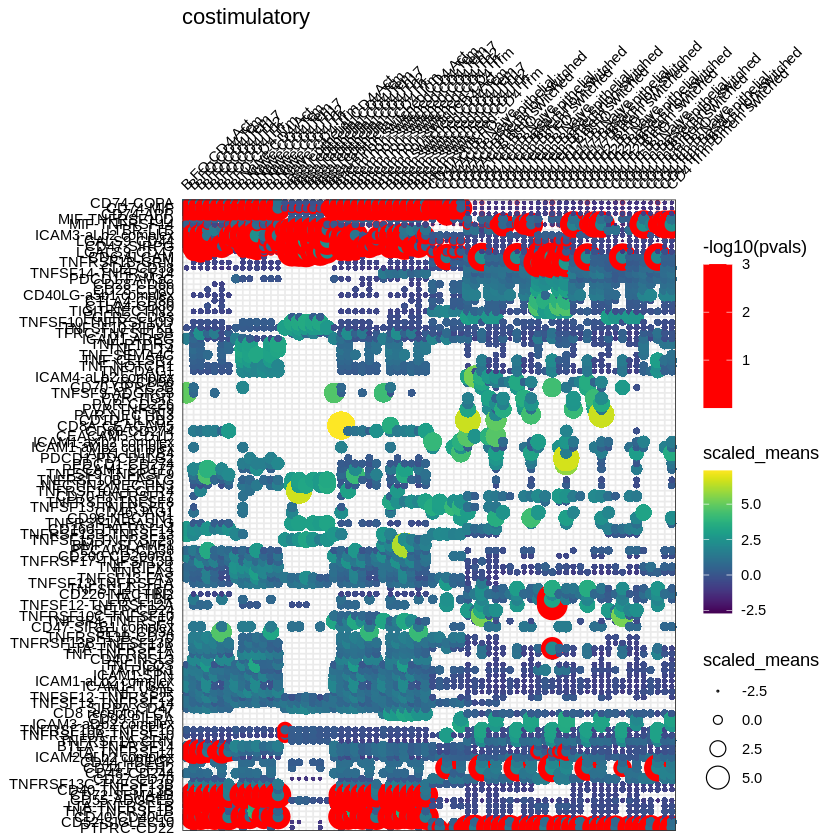

In [17]:

# Havent quite got this working yet 
 plot_cpdb(scdata = datand, cell_type1 = 'CD4', cell_type2 = 'B', gene.family = 'costimulatory',
	idents = 'subset_annotations', # column name where the cell ids are located in the metadata
	means = means, pvals = pvals) #+ 
#small_axis(fontsize = 3) + small_grid() + small_guide() + small_legend(fontsize = 2) # some helper functions included in ktplots to help with the plottin

In [ ]:
#```{R}
### for significant hits
# CPDB out files are located at Cellphone_DB/out
setwd("~/Mark/AAV/cpdb/cpdb_39_d1/out/")
sig.mean <- readr::read_tsv("significant_means.txt")

#write.csv(sig.mean, "test.csv")
#sig.mean <- read.csv("test.csv", header = T)

library(dplyr)

#filter rows that contain value. 1 is just arbitrarily selected
sig.mean <- sig.mean %>% filter(rank < 1)

dim(sig.mean)
colnames(sig.mean)

# convert sig mean to matrix with row names as interacting pair
sig.mean.mat <- as.data.frame(sig.mean[, 13:ncol(sig.mean)])
row.names(sig.mean.mat) <- sig.mean$interacting_pair

# plotting as corrplot
library(corrplot)
sig.mean.mat[is.na(sig.mean.mat)] <- 0

#write.csv(sig.mean.mat, 'test2.csv')

head(colnames(sig.mean.mat))


#sig.mean.mat2 <- sig.mean.mat[, -grep('^B.*_B|^B.*_T', colnames(sig.mean.mat))]
#sig.mean.mat2 <- sig.mean.mat[, grep('B GC|CD4 Tfh', colnames(sig.mean.mat))]
#sig.mean.mat2 <- sig.mean.mat[-which(rowSums(sig.mean.mat, na.rm = T) == 0), ]
#dim(sig.mean.mat2)
library(pheatmap)
#corrplot(t(as.matrix(sig.mean.mat2)), is.corr=F, tl.srt = 45, method = "circle", tl.cex = 2)

### filtering for top 25% interacting strength
sig.mean.mat.culled <- sig.mean.mat[,-which(colSums(sig.mean.mat, na.rm = T) < quantile(colSums(sig.mean.mat, na.rm = T)),0.75)]

dim(sig.mean.mat)
dim(sig.mean.mat.culled)

d1_sig.mean.mat.culled <- sig.mean.mat.culled
w12_sig.mean.mat.culled <- sig.mean.mat.culled

colnames(d1_sig.mean.mat.culled)
colnames(w12_sig.mean.mat.culled)

d1_sig.mean.mat.culled <- d1_sig.mean.mat.culled[,grep('KLRB1', colnames(d1_sig.mean.mat.culled), invert = T)]
w12_sig.mean.mat.culled <- w12_sig.mean.mat.culled[,grep('KLRB1', colnames(w12_sig.mean.mat.culled), invert = T)]

colnames(d1_sig.mean.mat.culled)
colnames(w12_sig.mean.mat.culled)

d1_sig.mean.mat.culled <- d1_sig.mean.mat.culled[,c(6, 7, 8, 9, 10, 14, 15, 16, 22, 23, 24, 25, 26, 31, 32, 33, 34, 39, 43, 45, 46, 50, 51, 52, 53, 54, 55, 60, 61)] 
w12_sig.mean.mat.culled <- w12_sig.mean.mat.culled[,c(5:9, 14:15, 17, 23:27, 32:35, 39, 48, 51:52, 56:60, 66:67)] 

x <- x[-24]

rownames(d1_sig.mean.mat.culled)
rownames(w12_sig.mean.mat.culled)

y <- unique(c(rownames(d1_sig.mean.mat.culled), rownames(w12_sig.mean.mat.culled)))

wanted_celltypes <- x
wanted_interactions <- y






match(colnames(w12_sig.mean.mat.culled),x)

x <- colnames(d1_sig.mean.mat.culled)

#sig.mean.mat2.culled <- sig.mean.mat2.culled[,-4]
#sig.mean.mat2.culled <- sig.mean.mat2.culled[-c(1:6, 18:21, 32),]
#sig.mean.mat2.culled <- sig.mean.mat2.culled[-c(5:12),]

#pdf("B_T_trimmed_39.pdf", w = 7, h = 5)
corrplot(t(as.matrix(d1_sig.mean.mat.culled)), is.corr=F, tl.srt = 45, method = "circle", tl.cex = 0.7)
corrplot(t(as.matrix(w12_sig.mean.mat.culled)), is.corr=F, tl.srt = 45, method = "circle", tl.cex = 0.7)
dev.off()

library(patchwork)
p1
## for only chemokines
mean <- readr::read_tsv("means.txt")

library(dplyr)

#filter rows that are chemokines
colnames(mean)

mean.mat <- as.data.frame(mean[, 12:ncol(mean)])
row.names(mean.mat) <- mean$interacting_pair

keep <- grep("CXCL|CCR|CXCR|CCL", row.names(mean.mat))

mean.mat.chemokine <- mean.mat[keep, ] 

# plot
pdf("cpdb.trans_2_TFH_B_cell.chemokine.plot.pdf", w = 50, h = 20)
corrplot(t(as.matrix(mean.mat.chemokine)), is.corr=F, tl.srt = 45, method = "circle",tl.cex = 0.7)
dev.off()







x <- readRDS("~/Mark/AAV/RDS_files/39_b.rds")
DimPlot(x)


Idents(data2) = 'celltype'
data2$celltype <- factor(data2$celltype, levels = c("CD4 Tnaive/cm", 
                                                    "CD4 Tcm"      , 
                                                    "CD4 Tcm_KLRB1", 
                                                    "CD4 Trm"     , 
                                                    "CD4 Tem"      , 
                                                    "CD4 Treg", 
                                                    "CD4 Tfh"      ),
                         labels = c("CD4 Tnaive/cm", 
                         "CD4 Tcm"      , 
                         "CD4 Tcm_KLRB1", 
                         "CD4 Trm"     , 
                         "CD4 Tem"      , 
                         "CD4 Treg", 
                         "CD4 Tfh"))
DimPlot(data2)













